<a href="https://colab.research.google.com/github/davidjcox333/Man-vs-Machine/blob/master/Policing_Model_Comparisons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Packages!!
import pandas as pd
import numpy as np
import scipy
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')
%cd './gdrive/My Drive/Policing Data'
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Policing Data


# Reading in data

In [2]:
# Read in our data
nash_ML = pd.read_csv('ML_fits_nash.csv')
nola_ML = pd.read_csv('ML_fits_nola.csv')

In [6]:
# Combine all dfs into single df
nash_ML['city'] = 'nashville'
nola_ML['city'] = 'new_orleans'
all_ml = pd.concat([nash_ML, nola_ML])
all_ml = all_ml.reset_index()
all_ml = all_ml.drop(['index'], axis=1)
all_ml.to_csv('All_ML_fits.csv')
all_ml

,algorithm,predicting,accuracy,precision,recall,F1,city
0,logistic_regression,citations,0.7856,0.7377,0.7856,0.7003,nashville
1,logistic_regression,frisks,0.9798,0.9599,0.9798,0.9697,nashville
2,logistic_regression,searches,0.9583,0.9195,0.9583,0.9380,nashville
3,logistic_regression,contraband,0.9914,0.9828,0.9914,0.9871,nashville
4,random_forest,citations,0.8520,0.8442,0.8520,0.8352,nashville
5,random_forest,frisks,0.9796,0.9675,0.9796,0.9697,nashville
6,random_forest,searches,0.9602,0.9557,0.9602,0.9432,nashville
7,random_forest,contraband,0.9915,0.9893,0.9915,0.9873,nashville
8,adaboost,citations,0.8041,0.7831,0.8041,0.7552,nashville
9,adaboost,frisks,0.9794,0.9662,0.9794,0.9693,nashville


# Accuracy plots

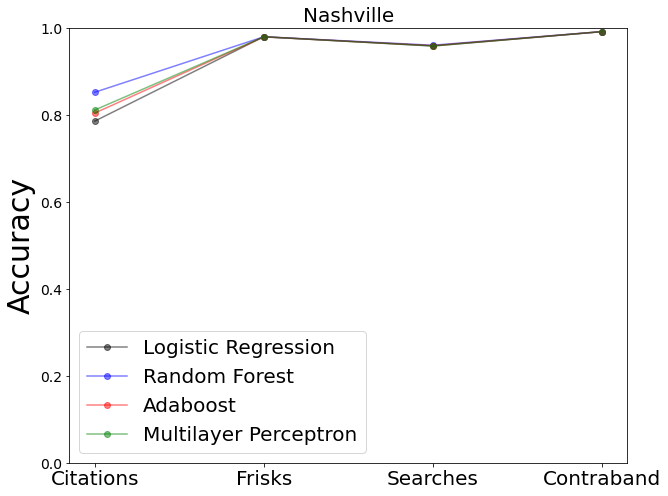

In [12]:
# Plot nashville accuracy by algorithm
x_axis = ['Citations', 'Frisks', 'Searches', 'Contraband']
acc = nash_ML.drop(['precision', 'recall', 'F1'], axis=1)
lr = acc[acc['algorithm']=='logistic_regression'].drop(['algorithm', 'predicting', 'city'], axis=1)
rf = acc[acc['algorithm']=='random_forest'].drop(['algorithm', 'predicting', 'city'], axis=1)
ada = acc[acc['algorithm']=='adaboost'].drop(['algorithm', 'predicting', 'city'], axis=1)
mlp = acc[acc['algorithm']=='multilayer_perceptron'].drop(['algorithm', 'predicting', 'city'], axis=1)

plt.figure(figsize=(10, 8))
plt.plot(x_axis, lr, color='black', marker='o', label='Logistic Regression', alpha=0.5)
plt.plot(x_axis, rf, color='blue', marker='o', label='Random Forest', alpha=0.5)
plt.plot(x_axis, ada, color='red', marker='o', label='Adaboost', alpha=0.5)
plt.plot(x_axis, mlp, color='green', marker='o', label='Multilayer Perceptron', alpha=0.5)
plt.title('Nashville', fontsize=20)
plt.ylabel('Accuracy', fontsize=30)
plt.xticks(fontsize=20)
plt.ylim(0, 1, 0.1)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
plt.show()

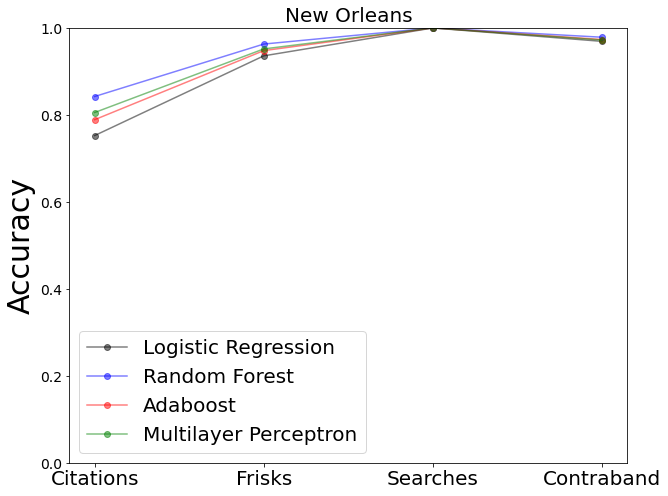

In [13]:
# Plot NOLA accuracy by algorithm
x_axis = ['Citations', 'Frisks', 'Searches', 'Contraband']
acc = nola_ML.drop(['precision', 'recall', 'F1'], axis=1)
lr = acc[acc['algorithm']=='logistic_regression'].drop(['algorithm', 'predicting', 'city'], axis=1)
rf = acc[acc['algorithm']=='random_forest'].drop(['algorithm', 'predicting', 'city'], axis=1)
ada = acc[acc['algorithm']=='adaboost'].drop(['algorithm', 'predicting', 'city'], axis=1)
mlp = acc[acc['algorithm']=='multilayer_perceptron'].drop(['algorithm', 'predicting', 'city'], axis=1)

plt.figure(figsize=(10, 8))
plt.plot(x_axis, lr, color='black', marker='o', label='Logistic Regression', alpha=0.5)
plt.plot(x_axis, rf, color='blue', marker='o', label='Random Forest', alpha=0.5)
plt.plot(x_axis, ada, color='red', marker='o', label='Adaboost', alpha=0.5)
plt.plot(x_axis, mlp, color='green', marker='o', label='Multilayer Perceptron', alpha=0.5)
plt.title('New Orleans', fontsize=20)
plt.ylabel('Accuracy', fontsize=30)
plt.xticks(fontsize=20)
plt.ylim(0, 1, 0.1)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
plt.show()

# Precision Plots

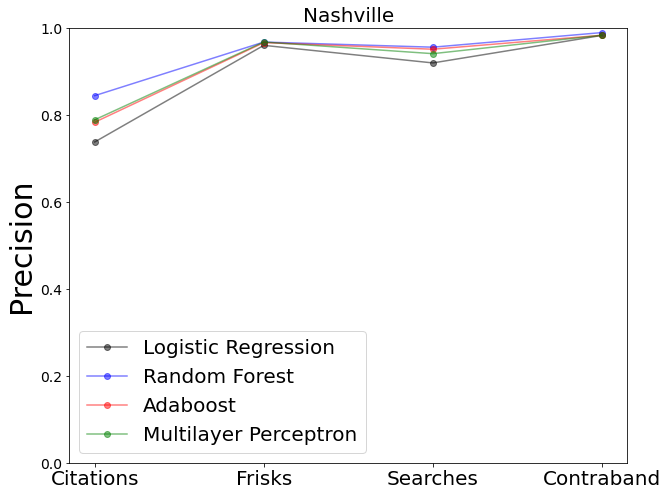

In [16]:
# Plot nashville precision by algorithm
x_axis = ['Citations', 'Frisks', 'Searches', 'Contraband']
acc = nash_ML.drop(['accuracy', 'recall', 'F1'], axis=1)
lr = acc[acc['algorithm']=='logistic_regression'].drop(['algorithm', 'predicting', 'city'], axis=1)
rf = acc[acc['algorithm']=='random_forest'].drop(['algorithm', 'predicting', 'city'], axis=1)
ada = acc[acc['algorithm']=='adaboost'].drop(['algorithm', 'predicting', 'city'], axis=1)
mlp = acc[acc['algorithm']=='multilayer_perceptron'].drop(['algorithm', 'predicting', 'city'], axis=1)

plt.figure(figsize=(10, 8))
plt.plot(x_axis, lr, color='black', marker='o', label='Logistic Regression', alpha=0.5)
plt.plot(x_axis, rf, color='blue', marker='o', label='Random Forest', alpha=0.5)
plt.plot(x_axis, ada, color='red', marker='o', label='Adaboost', alpha=0.5)
plt.plot(x_axis, mlp, color='green', marker='o', label='Multilayer Perceptron', alpha=0.5)
plt.title('Nashville', fontsize=20)
plt.ylabel('Precision', fontsize=30)
plt.xticks(fontsize=20)
plt.ylim(0, 1, 0.1)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
plt.show()

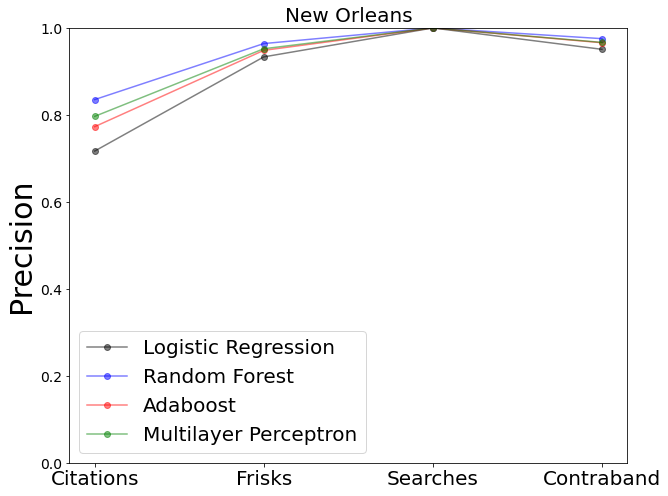

In [17]:
# Plot NOLA precision by algorithm
x_axis = ['Citations', 'Frisks', 'Searches', 'Contraband']
acc = nola_ML.drop(['accuracy', 'recall', 'F1'], axis=1)
lr = acc[acc['algorithm']=='logistic_regression'].drop(['algorithm', 'predicting', 'city'], axis=1)
rf = acc[acc['algorithm']=='random_forest'].drop(['algorithm', 'predicting', 'city'], axis=1)
ada = acc[acc['algorithm']=='adaboost'].drop(['algorithm', 'predicting', 'city'], axis=1)
mlp = acc[acc['algorithm']=='multilayer_perceptron'].drop(['algorithm', 'predicting', 'city'], axis=1)

plt.figure(figsize=(10, 8))
plt.plot(x_axis, lr, color='black', marker='o', label='Logistic Regression', alpha=0.5)
plt.plot(x_axis, rf, color='blue', marker='o', label='Random Forest', alpha=0.5)
plt.plot(x_axis, ada, color='red', marker='o', label='Adaboost', alpha=0.5)
plt.plot(x_axis, mlp, color='green', marker='o', label='Multilayer Perceptron', alpha=0.5)
plt.title('New Orleans', fontsize=20)
plt.ylabel('Precision', fontsize=30)
plt.xticks(fontsize=20)
plt.ylim(0, 1, 0.1)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
plt.show()

# Recall plots

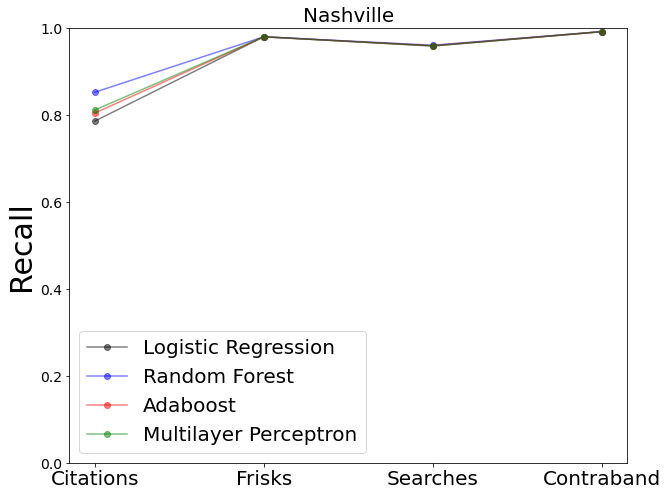

In [18]:
# Plot nashville recall by algorithm
x_axis = ['Citations', 'Frisks', 'Searches', 'Contraband']
acc = nash_ML.drop(['accuracy', 'precision', 'F1'], axis=1)
lr = acc[acc['algorithm']=='logistic_regression'].drop(['algorithm', 'predicting', 'city'], axis=1)
rf = acc[acc['algorithm']=='random_forest'].drop(['algorithm', 'predicting', 'city'], axis=1)
ada = acc[acc['algorithm']=='adaboost'].drop(['algorithm', 'predicting', 'city'], axis=1)
mlp = acc[acc['algorithm']=='multilayer_perceptron'].drop(['algorithm', 'predicting', 'city'], axis=1)

plt.figure(figsize=(10, 8))
plt.plot(x_axis, lr, color='black', marker='o', label='Logistic Regression', alpha=0.5)
plt.plot(x_axis, rf, color='blue', marker='o', label='Random Forest', alpha=0.5)
plt.plot(x_axis, ada, color='red', marker='o', label='Adaboost', alpha=0.5)
plt.plot(x_axis, mlp, color='green', marker='o', label='Multilayer Perceptron', alpha=0.5)
plt.title('Nashville', fontsize=20)
plt.ylabel('Recall', fontsize=30)
plt.xticks(fontsize=20)
plt.ylim(0, 1, 0.1)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
plt.show()

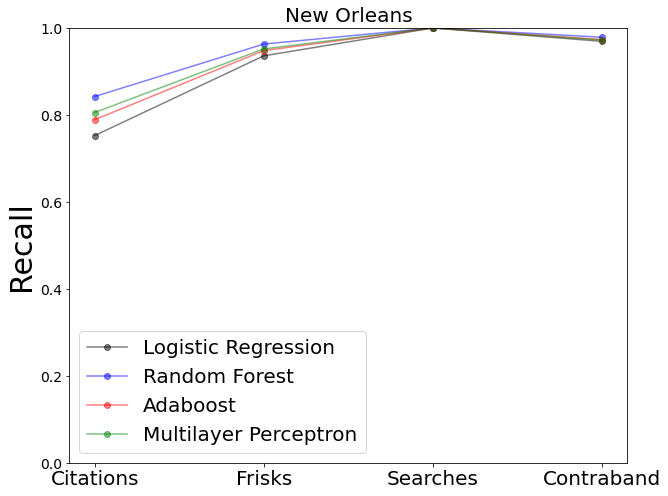

In [19]:
# Plot NOLA recall by algorithm
x_axis = ['Citations', 'Frisks', 'Searches', 'Contraband']
acc = nola_ML.drop(['accuracy', 'precision', 'F1'], axis=1)
lr = acc[acc['algorithm']=='logistic_regression'].drop(['algorithm', 'predicting', 'city'], axis=1)
rf = acc[acc['algorithm']=='random_forest'].drop(['algorithm', 'predicting', 'city'], axis=1)
ada = acc[acc['algorithm']=='adaboost'].drop(['algorithm', 'predicting', 'city'], axis=1)
mlp = acc[acc['algorithm']=='multilayer_perceptron'].drop(['algorithm', 'predicting', 'city'], axis=1)

plt.figure(figsize=(10, 8))
plt.plot(x_axis, lr, color='black', marker='o', label='Logistic Regression', alpha=0.5)
plt.plot(x_axis, rf, color='blue', marker='o', label='Random Forest', alpha=0.5)
plt.plot(x_axis, ada, color='red', marker='o', label='Adaboost', alpha=0.5)
plt.plot(x_axis, mlp, color='green', marker='o', label='Multilayer Perceptron', alpha=0.5)
plt.title('New Orleans', fontsize=20)
plt.ylabel('Recall', fontsize=30)
plt.xticks(fontsize=20)
plt.ylim(0, 1, 0.1)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
plt.show()

# F1 plots

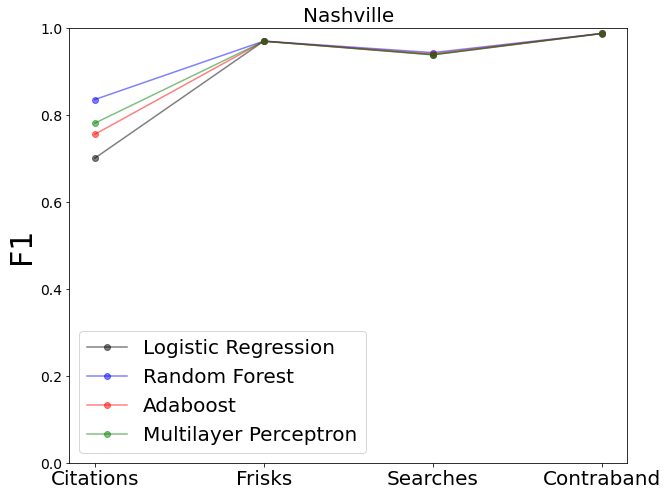

In [20]:
# Plot nashville recall by algorithm
x_axis = ['Citations', 'Frisks', 'Searches', 'Contraband']
acc = nash_ML.drop(['accuracy', 'precision', 'recall'], axis=1)
lr = acc[acc['algorithm']=='logistic_regression'].drop(['algorithm', 'predicting', 'city'], axis=1)
rf = acc[acc['algorithm']=='random_forest'].drop(['algorithm', 'predicting', 'city'], axis=1)
ada = acc[acc['algorithm']=='adaboost'].drop(['algorithm', 'predicting', 'city'], axis=1)
mlp = acc[acc['algorithm']=='multilayer_perceptron'].drop(['algorithm', 'predicting', 'city'], axis=1)

plt.figure(figsize=(10, 8))
plt.plot(x_axis, lr, color='black', marker='o', label='Logistic Regression', alpha=0.5)
plt.plot(x_axis, rf, color='blue', marker='o', label='Random Forest', alpha=0.5)
plt.plot(x_axis, ada, color='red', marker='o', label='Adaboost', alpha=0.5)
plt.plot(x_axis, mlp, color='green', marker='o', label='Multilayer Perceptron', alpha=0.5)
plt.title('Nashville', fontsize=20)
plt.ylabel('F1', fontsize=30)
plt.xticks(fontsize=20)
plt.ylim(0, 1, 0.1)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
plt.show()

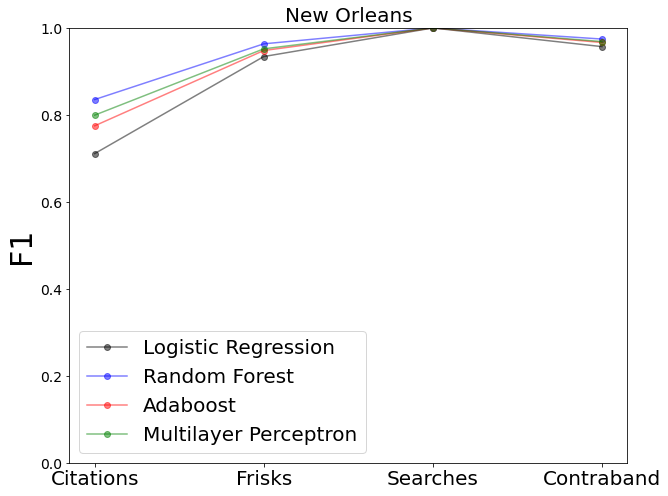

In [21]:
# Plot NOLA recall by algorithm
x_axis = ['Citations', 'Frisks', 'Searches', 'Contraband']
acc = nola_ML.drop(['accuracy', 'precision', 'recall'], axis=1)
lr = acc[acc['algorithm']=='logistic_regression'].drop(['algorithm', 'predicting', 'city'], axis=1)
rf = acc[acc['algorithm']=='random_forest'].drop(['algorithm', 'predicting', 'city'], axis=1)
ada = acc[acc['algorithm']=='adaboost'].drop(['algorithm', 'predicting', 'city'], axis=1)
mlp = acc[acc['algorithm']=='multilayer_perceptron'].drop(['algorithm', 'predicting', 'city'], axis=1)

plt.figure(figsize=(10, 8))
plt.plot(x_axis, lr, color='black', marker='o', label='Logistic Regression', alpha=0.5)
plt.plot(x_axis, rf, color='blue', marker='o', label='Random Forest', alpha=0.5)
plt.plot(x_axis, ada, color='red', marker='o', label='Adaboost', alpha=0.5)
plt.plot(x_axis, mlp, color='green', marker='o', label='Multilayer Perceptron', alpha=0.5)
plt.title('New Orleans', fontsize=20)
plt.ylabel('F1', fontsize=30)
plt.xticks(fontsize=20)
plt.ylim(0, 1, 0.1)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
plt.show()